In [1]:
import numpy as np 
import pandas as pd 
from classLib_yash_Copy1 import *
import random

import matplotlib.pyplot as plt

In [2]:

randompoints= [] # generating random point between 0 and 1
for i in range(1000): 
    a=[np.round(random.random(),4), np.round(random.random(),4)]
    randompoints.append(a)
print('length of random points:',len(randompoints))
allWaypoint = [] #here selecting the points which have a distance of more than 0.2 from every other (no justification as to why 0.2)
for j in range(len(randompoints)):
    a=[]
    for k in range(j+1,len(randompoints)):
        s=np.linalg.norm(np.array(randompoints[j])-np.array(randompoints[k])) # not efficient way to claculate distance of one point from all others
        a.append(s)
    if all(i>0.16 for i in a):
        allWaypoint.append(randompoints[j])
print('no of waypoints:', len(allWaypoint))
wpList = allWaypoint[:15] #need 15 waypoints

wpList=np.round(wpList,4)
print(wpList, len(wpList))


length of random points: 1000
no of waypoints: 13
[[0.994  0.0485]
 [0.0835 0.0329]
 [0.7532 0.2059]
 [0.4431 0.4392]
 [0.7034 0.3826]
 [0.0985 0.5203]
 [0.1518 0.3641]
 [0.6892 0.7022]
 [0.257  0.8461]
 [0.9649 0.231 ]
 [0.541  0.0596]
 [0.8577 0.7717]
 [0.9155 0.4666]] 13


In [3]:
wpN = ['wpA','wpB','wpC','wpD','wpE','wpF','wpG','wpH','wpI', 'wpJ','wpK','wpL','wpM', 'wpN','wpO','wpP']
wpNameList=wpN[:len(wpList)]
#print(wpNames)
waypointList =[]
for i in range(len(wpList)):
    waypointList.append(WayPoint(wpNameList[i],wpList[i])) #list containing waypoint class elements
print("****")
print(waypointList[0].name)


****
wpA


In [4]:
##################################    AIRWAYS  #####################################################
# Here, airway is a subclass of wayPoint class and every 
wayPointInfo=[]
for i in range(len(waypointList)):
    wayPointInfo.append([waypointList[i].name,waypointList[i].x,waypointList[i].y])
print(wayPointInfo)
airwayList=[]
# sampled_airways=[]
for i in range(8): #no of airways chosen 8 at random
    points = random.sample(waypointList,2)
    airwayList.append(Airways( points[0].name +' - '+ points[1].name, points[0], points[1]))
    # sampled_airways.append(points)
        

[['wpA', 0.994, 0.0485], ['wpB', 0.0835, 0.0329], ['wpC', 0.7532, 0.2059], ['wpD', 0.4431, 0.4392], ['wpE', 0.7034, 0.3826], ['wpF', 0.0985, 0.5203], ['wpG', 0.1518, 0.3641], ['wpH', 0.6892, 0.7022], ['wpI', 0.257, 0.8461], ['wpJ', 0.9649, 0.231], ['wpK', 0.541, 0.0596], ['wpL', 0.8577, 0.7717], ['wpM', 0.9155, 0.4666]]


In [5]:
airwayList[0].name

'wpF - wpM'

In [6]:
ac_per_scenario = 8  # just a random number to have no of aircraft in one scenario
aircraftList=[]
aircraft_name=np.arange(ac_per_scenario)
for i in range(ac_per_scenario):
    point = np.random.choice(airwayList)
    aircraft= Aircraft(aircraft_name[i],point)
    aircraftList.append(aircraft)


In [7]:
d= Scenario(waypointList,airwayList)

In [8]:
d.waypointinfo()

[['wpA', 0.994, 0.0485],
 ['wpB', 0.0835, 0.0329],
 ['wpC', 0.7532, 0.2059],
 ['wpD', 0.4431, 0.4392],
 ['wpE', 0.7034, 0.3826],
 ['wpF', 0.0985, 0.5203],
 ['wpG', 0.1518, 0.3641],
 ['wpH', 0.6892, 0.7022],
 ['wpI', 0.257, 0.8461],
 ['wpJ', 0.9649, 0.231],
 ['wpK', 0.541, 0.0596],
 ['wpL', 0.8577, 0.7717],
 ['wpM', 0.9155, 0.4666]]

In [9]:
d.airwayinfo()

[[0.0985, 0.5203, 0.9155, 0.4666],
 [0.0835, 0.0329, 0.994, 0.0485],
 [0.1518, 0.3641, 0.0835, 0.0329],
 [0.0985, 0.5203, 0.9155, 0.4666],
 [0.9155, 0.4666, 0.6892, 0.7022],
 [0.7532, 0.2059, 0.0985, 0.5203],
 [0.0985, 0.5203, 0.257, 0.8461],
 [0.994, 0.0485, 0.7034, 0.3826]]

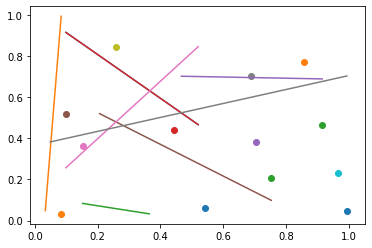

In [11]:
d.plot()

In [ ]:
#test